In [1]:
import numpy as np
from PIL import Image

## dHASH值是什么
Hash值的实质就是将数组中的0和1转化为二进制数，再将二进制数转为16进制数。比如长度为8的数组1, 0, 0, 1, 1, 1, 0, 1，可以视作二进制数字10011101，最后转为十六进制数为，这就是dHash编码

In [2]:
def arr_to_hex(arr):    
    bin_num = ''.join(map(str, arr))
    hex_num = hex(int(bin_num, 2))
    return hex_num[2:].rjust(2, '0')


## 数组的长度8有什么意义 
每4位二进制数可以用1位16进制数表示，因为2的4次方等于16。所以8位的二进制数可以用2位16进制数来表示。

In [4]:
a = [0] * 8
b = [0] * 4 + [1] * 4
c = [1] * 8
print("a is %s" % arr_to_hex(a))
print("b is %s" % arr_to_hex(b))
print("c is %s" % arr_to_hex(c))


a is 00
b is 0f
c is ff


## 位运算知识
1. 按位异或运算：0^0=0; 0^1=1; 1^0=1; 1^1=0，可以计算两个二进制数字有多少不同，比如"0011"和"1010"，1和4位不同，所以结果是1001
2. 按位与运算：0&0=0;  0&1=0;  1&0=0;  1&1=1; x & (x - 1)可以把数字中的最右侧的1清零。比如11100000 & 11100000 - 1，结果是11000000
3. 二进制减法：1-1 = 0, 10-1 = 1, 0-0 = 0

In [5]:
a = '0011'
b = '1010'
print(bin(int(a, 2) ^ int(b, 2)))

0b1001


In [6]:
a = '11100000'
b = bin(int(a, 2) - 1)[2:]
c = bin(int(a, 2) & int(b, 2))[2:]
print(a, b, c, sep='\n')

11100000
11011111
11000000


## 如何计算两个dHash值之间的差异
1. 将Hash值还原为10进制数字
2. 将这对10进制数字做按位异或运算，得到二进制数b
3. 利用按位与运算数一数b中包含多少个1  
  
汉明距离表示两个（相同长度）字对应位不同的数量

In [8]:
def hamming_distance(h1, h2):
    # 求两个编码的差异
    b = int(h1, 16) ^ int(h2, 16)
    # 数数有多少个1
    distance = 0
    while b:
        b &= b - 1
        distance += 1
    return distance

In [9]:
# 把二进制数不停的左移/右移，数多少个1

In [10]:
# 每次h1和h2都会相同
h1 = 'ff1a1b1122335566'
h2 = 'ff1a1b1122335561'

hamming_distance(h1, h2)

3

## 图片相似度计算的完整代码
1. 将图片转为diff
2. 将diff转为dHash
3. 计算汉明距离

In [ ]:
[1,1,1,1,1,1,1] = 1a
[1,1,1,1,1,0,0] = ff
...
[1,1,1,0,1,1,1] = 0b

In [ ]:
11001
2 ** 0 + 2 ** 3 + 2 ** 4
int((''.join(map(str,row)), 2))

In [26]:
def get_diff(image, hash_size=8):
    if hash_size < 2:
        raise ValueError("Hash size must be greater than or equal to 2")
    pixels = np.asarray(image.resize((hash_size+1, hash_size)).convert("L"))
    # 第1~n列与第0~n-1列进行比较
    diff = pixels[:, 1:] > pixels[:, :-1]
    return diff

def get_dhash(diff):
    hash_string = ''
    for row in diff:
        decimal_value = (2 ** np.where(row[::-1])[0]).sum()
        # 不足2位以0填充，0xf=>0x0f 
        hash_string += hex(decimal_value)[2:].rjust(2, "0")
    return hash_string

def hamming_distance(h1, h2):
    # 求两个编码的差异
    b = int(h1, 16) ^ int(h2, 16)
    # 数数有多少个1
    distance = 0
    while b:
        b &= b - 1
        distance += 1
    return distance


## 加载图片
1. image是windows自带的桌面背景图  
2. image1是将image缩放并调色

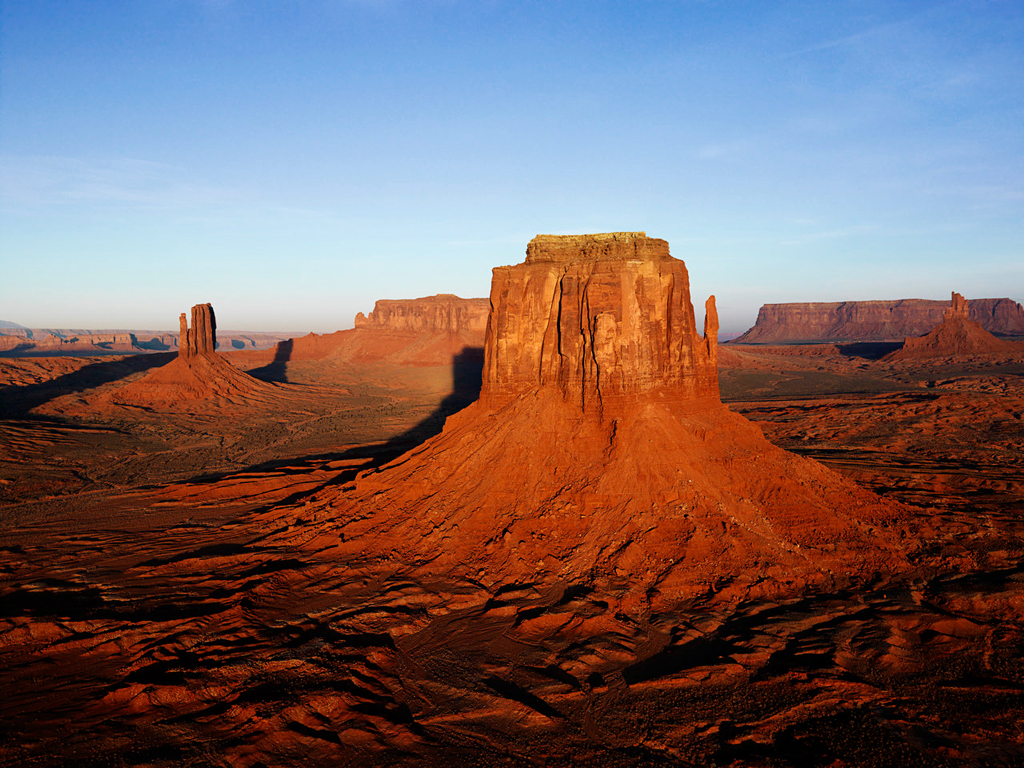

In [11]:
image = Image.open(r"C:\Users\Public\Pictures\Sample Pictures\shamo.jpg")
image

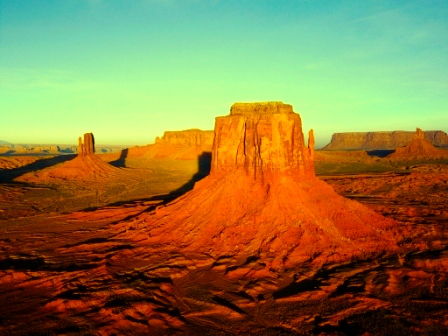

In [12]:
image1 = Image.open(r"C:\Users\Public\Pictures\Sample Pictures\shamo1.jpg")
image1

## 调整图片大小 

分别查看两幅图的尺寸

In [13]:
print(image.size, image1.size)

(1024, 768) (448, 336)


大图缩放至小图的大小

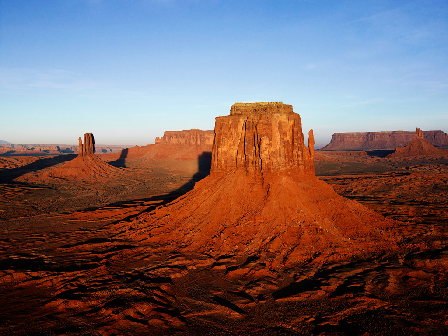

In [14]:
image.resize(image1.size)

## RGB值域 

In [15]:
a = np.asarray(image.resize(image1.size))
b = np.asarray(image1)
print(np.min(a), np.max(a))
print(np.min(b), np.max(b))

0 255
0 255


## 对比图片dhash

可见两幅图片看起来相似，但将近一半的dhash值不同

In [17]:
a = (a[:, 1:] > a[:, :-1])
b = (b[:, 1:] > b[:, :-1])
np.mean(a == b)
print(a)

[[[False False  True]
  [False False False]
  [False False False]
  ...
  [ True False False]
  [False False  True]
  [False False False]]

 [[False  True  True]
  [False False False]
  [False False False]
  ...
  [False False  True]
  [False False False]
  [False False False]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False  True False]
  [ True False False]
  [False False  True]]

 ...

 [[ True  True False]
  [False False False]
  [False False False]
  ...
  [False  True  True]
  [False False False]
  [ True  True False]]

 [[False False  True]
  [ True  True False]
  [False False  True]
  ...
  [ True  True False]
  [False False  True]
  [ True  True False]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [ True  True  True]]]


分别查看RGB三个通道dhash值的差异，发现B通道的差异最大

In [ ]:
np.mean(a[:,:,0] == b[:,:,0])

In [ ]:
np.mean(a[:,:,1] == b[:,:,1])

In [ ]:
np.mean((a[:,:,2] == b[:,:,2]))

## 转为灰度图片

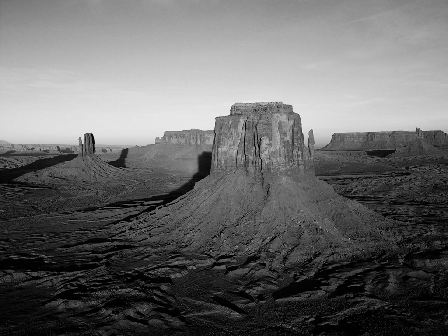

In [18]:
a = np.asarray(image.resize(image1.size).convert("L"))
image.resize(image1.size).convert("L")

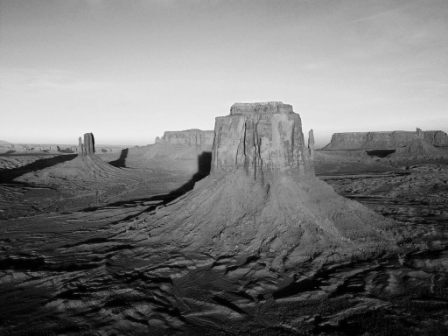

In [19]:
b = np.asarray(image1.convert("L"))
image1.convert("L")

相似度提升至67%，仍然不是满意的结果

## 通过下采样的方式消除异常值的影响 

In [20]:
a = (a[:, 1:] > a[:, :-1])
b = (b[:, 1:] > b[:, :-1])
np.mean(a == b)
print(a)

[[ True  True False ...  True False False]
 [False  True False ... False False False]
 [ True  True  True ... False False False]
 ...
 [False  True False ... False False  True]
 [False False  True ...  True False  True]
 [ True False False ... False False  True]]


使用scipy进行矩阵的下采样，图片的相似度提升至83%

In [ ]:
from scipy import ndimage

In [ ]:
a = np.asarray(image.resize(image1.size).convert("L"))
b = np.asarray(image1.convert("L"))
a = (a[:, 1:] > a[:, :-1])
b = (b[:, 1:] > b[:, :-1])

In [ ]:
zoom = (9, 8)
az = ndimage.zoom(a, zoom)
bz = ndimage.zoom(b, zoom)
np.mean(az == bz)

## 尝试DHASH原始算法 

In [ ]:
hash_size = 8
a = np.asarray(image.resize((hash_size+1, hash_size)).convert("L"))
b = np.asarray(image1.resize((hash_size+1, hash_size)).convert("L"))

In [ ]:
a = (a[:, 1:] > a[:, :-1])
b = (b[:, 1:] > b[:, :-1])
np.mean(a == b)

## 尝试对DHASH原始算法改造

In [ ]:
hash_size = 256
a = np.asarray(image.resize((hash_size+1, hash_size)).convert("L"))
b = np.asarray(image1.resize((hash_size+1, hash_size)).convert("L"))

In [ ]:
a = (a[:, 1:] > a[:, :-1])
b = (b[:, 1:] > b[:, :-1])

In [ ]:
m, n = a.shape
for k in [2, 4, 8, 16, 32]:
    aa = a.reshape((-1, k)).mean(axis=1).reshape((m, -1)).T.reshape((-1, k)).mean(axis=1).reshape(m//k, n//k).T.round().astype('int')
    bb = b.reshape((-1, k)).mean(axis=1).reshape((m, -1)).T.reshape((-1, k)).mean(axis=1).reshape(m//k, n//k).T.round().astype('int')
    print(k, str(np.mean(aa == bb))[:4], np.sum(aa != bb))

效果貌似有提升哦

In [ ]:
def d_hash(image):
    new_size = 256
    pixels = np.asarray(image.resize((new_size+1, new_size)).convert("L"))
    # 第1~n列与第0~n-1列进行比较
    diff = pixels[:, 1:] > pixels[:, :-1]
    m, n = diff.shape
    hash_size = 8
    k = new_size // hash_size
    # 对矩阵进行下采样，256 * 256 矩阵转为8 * 8矩阵，先压缩行，再压缩列，压缩的方式是求平均值并取整
    return diff.reshape((-1, k)).mean(axis=1).reshape((m, -1)).T.reshape((-1, k)).\
           mean(axis=1).reshape(hash_size, hash_size).T.round().astype('int')